In [8]:
import pandas as pd
import numpy as np
import datetime

df=pd.read_csv('customer_transactions_RFM.csv')

In [5]:
df

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Category,Country,Channel,Age,Gender,Membership,RegistrationDate,Occupation
0,C03649,INV126225,2025-01-29,5,19.82,99.10,Home,UK,Online,35,Female,NaN,2024-09-10,Sales
1,C04573,INV872246,2023-04-15,1,87.29,87.29,Books,India,Mobile,21,Other,NaN,2024-08-18,Sales
2,C02849,INV719176,2024-03-08,3,97.14,291.42,Electronics,USA,Online,27,Other,Silver,2023-02-22,Student
3,C07165,INV343962,2024-06-01,3,22.42,67.26,Toys,USA,Mobile,24,Female,NaN,2023-04-23,Manager
4,C06516,INV850800,2024-10-27,3,32.67,98.01,Books,China,In-store,30,Male,Gold,2023-05-14,Artist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,C17221,INV412170,2024-07-05,3,97.70,293.10,Toys,China,In-store,19,Female,Silver,2023-06-18,Engineer
199996,C18255,INV168135,2025-05-19,3,22.74,68.22,Beauty,UK,Mobile,56,Other,Silver,2024-02-20,Artist
199997,C07925,INV171285,2024-12-25,3,59.43,178.29,Beauty,Germany,Mobile,25,Male,Gold,2023-10-25,Artist
199998,C03630,INV964222,2024-06-17,3,9.09,27.27,Books,Brazil,Online,40,Male,NaN,2023-12-22,Artist


In [12]:
from datetime import timedelta


# Convert entire column from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Then get the max date
invoiceDate = df['InvoiceDate'].max()


snapshot_date = invoiceDate + timedelta(days=1)


In [13]:
snapshot_date

Timestamp('2025-08-02 00:00:00')

In [14]:
rfm = df.groupby('CustomerID').agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency
'InvoiceNo': 'nunique', # Frequency
'TotalAmount': 'sum' # Monetary
})

In [15]:
rfm

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
C00001,7,12,2355.48
C00002,62,13,1375.04
C00003,275,8,1156.69
C00004,70,7,1692.09
C00005,16,9,1819.42
...,...,...,...
C19996,15,12,1751.18
C19997,93,12,1441.84
C19998,9,8,1243.01


In [16]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [18]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5,labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] =pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5,labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Score'] = rfm['R_score'].astype(str)+ rfm['F_score'].astype(str) +rfm['M_score'].astype(str)

In [19]:
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
C00001,7,12,2355.48,5,4,5,545
C00002,62,13,1375.04,3,4,3,343
C00003,275,8,1156.69,1,2,2,122
C00004,70,7,1692.09,3,1,4,314
C00005,16,9,1819.42,5,2,4,524
...,...,...,...,...,...,...,...
C19996,15,12,1751.18,5,4,4,544
C19997,93,12,1441.84,2,4,3,243
C19998,9,8,1243.01,5,2,2,522


Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)


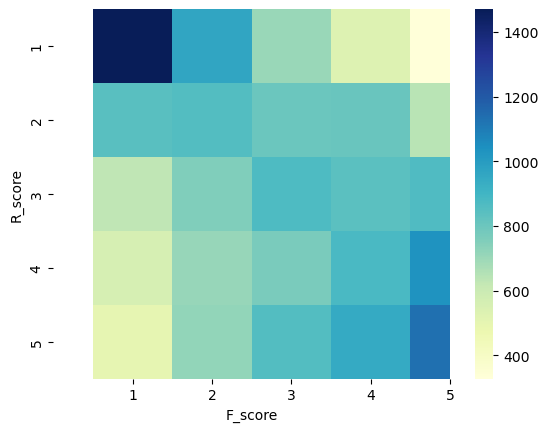

In [25]:
import seaborn as sns
##热力图：客户分布在不同 R 和 F 分数的格子中
sns.heatmap(rfm.groupby(['R_score', 'F_score']).size().unstack(), cmap="YlGnBu")

Axes(0.125,0.11;0.775x0.77)


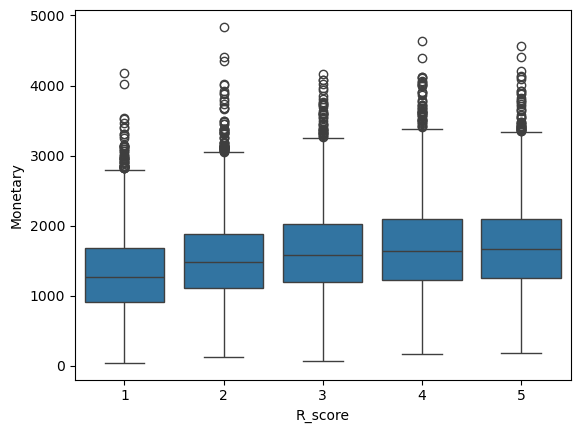

In [26]:
##箱线图：不同 R 分数的 Monetary 分布
print(sns.boxplot(data=rfm, x='R_score', y='Monetary'))

<Axes: xlabel='RFM_Class'>

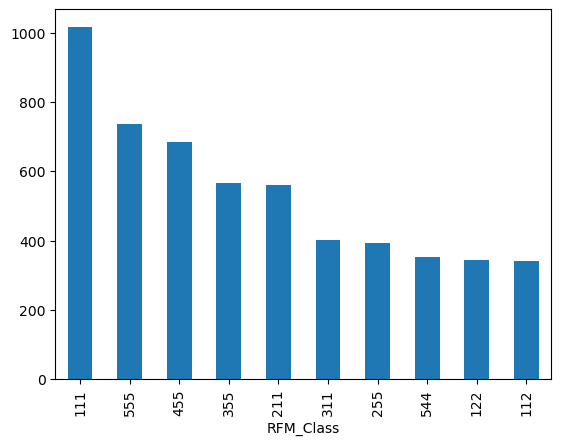

In [27]:
##柱状图：不同 RFM 分组的客户数量
rfm['RFM_Class'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Class'].value_counts().head(10).plot(kind='bar')